In [1]:
!pip install librosa

# 請利用librosa套件讀取聲音檔案，並且取得13 維的梅爾倒頻譜係數

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 聲音檔案的路徑
audio_path = "/content/blues.00000.wav"

# 使用 librosa 讀取聲音檔案
y, sr = librosa.load(audio_path, sr=None)

# 取得梅爾倒頻譜係數（MFCC）
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs

array([[-2.40635422e+02, -2.11214355e+02, -1.93908890e+02, ...,
        -1.09999146e+02, -8.68144302e+01, -8.40735855e+01],
       [ 9.96476288e+01,  1.01042831e+02,  1.02243958e+02, ...,
         1.50079346e+02,  1.38948669e+02,  1.38309769e+02],
       [-7.40327501e+00, -8.35852718e+00,  1.91543508e+00, ...,
        -5.07951355e+01, -3.65361443e+01, -2.81363564e+01],
       ...,
       [-2.22810173e+00, -4.09619761e+00, -9.18501282e+00, ...,
        -1.21473036e+01, -9.28038692e+00, -1.04724808e+01],
       [-3.98046875e+00,  1.07179880e+00, -2.12721848e+00, ...,
         6.25275421e+00,  2.70401573e+00,  4.79280353e-02],
       [-9.62526202e-01, -1.38649666e+00, -3.84490490e+00, ...,
         4.95667458e+00, -2.70487809e+00, -6.35826778e+00]], dtype=float32)

# 請利用librosa套件讀取聲音檔案的384特徵

In [10]:
import numpy as np

# 使用 librosa 讀取聲音檔案
y, sr = librosa.load(audio_path, sr=None)

# 計算 chroma 特徵（12 維）
chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12)

# 計算 melspectrogram 特徵（128 維）
melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# 計算 tempogram 特徵（12 維）
tempogram = librosa.feature.tempogram(y=y, sr=sr)

# 將所有特徵串聯在一起，形成 384 維的特徵向量
features = np.concatenate([chroma, melspectrogram, tempogram], axis=0)

# 確認特徵的維度
print(features.shape)

(524, 1293)


# 請繪製聲音頻譜圖

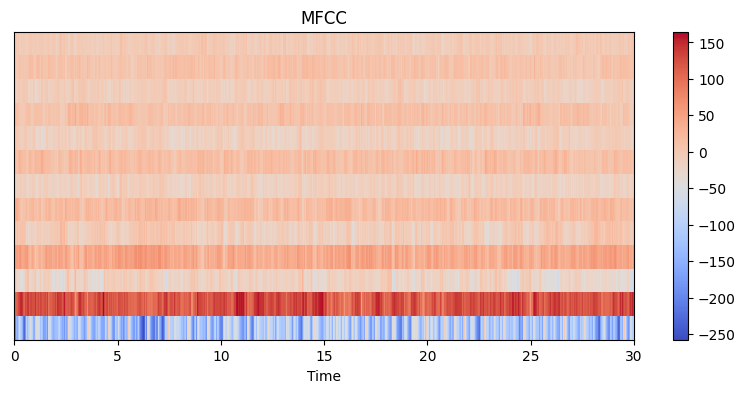

In [13]:
# 顯示 MFCC 圖表
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

# 請寫一個相似度函式，比對兩首歌曲的相似程度

In [14]:
import librosa
import numpy as np
from scipy.spatial.distance import cosine

def load_and_extract_features(audio_path):
    # 使用 librosa 讀取聲音檔案
    y, sr = librosa.load(audio_path, sr=None)

    # 提取 MFC 梅爾頻率倒譜係數（MFCC）特徵
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    return mfcc

def compute_similarity(audio_path1, audio_path2):
    # 讀取並提取第一首歌曲的特徵
    features1 = load_and_extract_features(audio_path1)

    # 讀取並提取第二首歌曲的特徵
    features2 = load_and_extract_features(audio_path2)

    # 將特徵矩陣展平成一維向量
    flat_features1 = features1.flatten()
    flat_features2 = features2.flatten()

    # 計算餘弦相似度
    similarity = 1 - cosine(flat_features1, flat_features2)

    return similarity

# 兩首歌曲的檔案路徑
audio_path1 = "/content/blues.00000.wav"
audio_path2 = "/content/blues.00001.wav"

# 計算相似度
similarity_score = compute_similarity(audio_path1, audio_path2)

# 顯示相似度
print(f"相似度：{similarity_score}")


相似度：0.8143788576126099
